# Launch Turi Create

# Load house sales data

In [ ]:
pip install turicreate

In [1]:
import turicreate



In [2]:
from google.colab import files
data_to_load = files.upload()


Saving home_data.csv to home_data.csv


In [ ]:
sales = turicreate.SFrame('home_data.csv')

In [47]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000,3,2.5,1890,6560,2.0,0,0


# Explore

In [48]:
sales.show()

Materializing SFrame

In [50]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'], xlabel ='Sq Ft', ylabel= 'Price')

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [51]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [52]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005078     | 4346985.374280     | 2008563.827886       | 263510.637777                   | 251940.894551                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [53]:
print (test_set['price'].mean())

543054.042563


In [54]:
print (sqft_model.evaluate(test_set))

{'max_error': 4141567.820066843, 'rmse': 255197.190676925}


# Explore model a little further

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


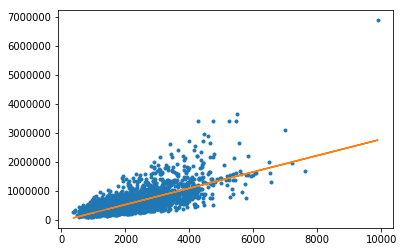

In [56]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

In [57]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47665.2223034,5052.67547303
sqft_living,None,282.214095272,2.21546368204


# Explore other features of the data

In [58]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [59]:
sales[my_features].show()

Materializing SFrame

In [60]:
turicreate.show(sales[1:4999]['zipcode'],sales[1:4999]['price'], xlabel='ZIP CODE',ylabel='Price in $')

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [61]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.030145     | 4108857.285982     | 2244578.543713       | 256517.680618                   | 274128.008597                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [62]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [63]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4141567.820066843, 'rmse': 255197.190676925}
{'max_error': 3995199.078328617, 'rmse': 252734.11102570084}


# Statistics of one of Seattle's expensive zipcode

In [85]:
exp=sales[sales['zipcode']==98039]
  

In [87]:
exp.show()

Materializing SFrame

In [88]:
print (exp['price'].mean())

2160606.6


# Filtering all houses with greater than 2000 sqft and less than 4000 sq ft

In [90]:
certain_houses = sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)]

In [121]:
certain_houses.num_rows()


9221

In [118]:
sales.num_rows()

21613

# Regression model comparisons with some vs many features

In [127]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [128]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [129]:
training_set, test_set = sales.random_split(.8,seed=0)

In [130]:
my_features_model =turicreate.linear_regression.create(training_set,target='price',features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024968     | 4091252.851068     | 257411.521124                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [131]:
advanced_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 19

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.051155     | 4313845.796163     | 202879.786274                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [134]:
print (my_features_model.evaluate(test_set))
print (advanced_features_model.evaluate(test_set))

{'max_error': 3980583.1422270127, 'rmse': 252787.38364179188}
{'max_error': 4104391.870362673, 'rmse': 199908.40407363418}
